<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/TEMPERATURA/KATFLOWmeter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [3]:
#@title CARGA DE DATA_SET
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/TEMPERATURA/6292023_H20_drive.csv" #@param {type:"string"}
datos = pd.read_csv(Url,sep=",",decimal=".")
df=pd.DataFrame(datos)
dfx=df.copy()


In [8]:
dfx.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         61 non-null     float64
 1   Velocity     61 non-null     float64
 2   Flow_meters  61 non-null     float64
 3   Flow_liters  61 non-null     float64
dtypes: float64(4)
memory usage: 2.1 KB


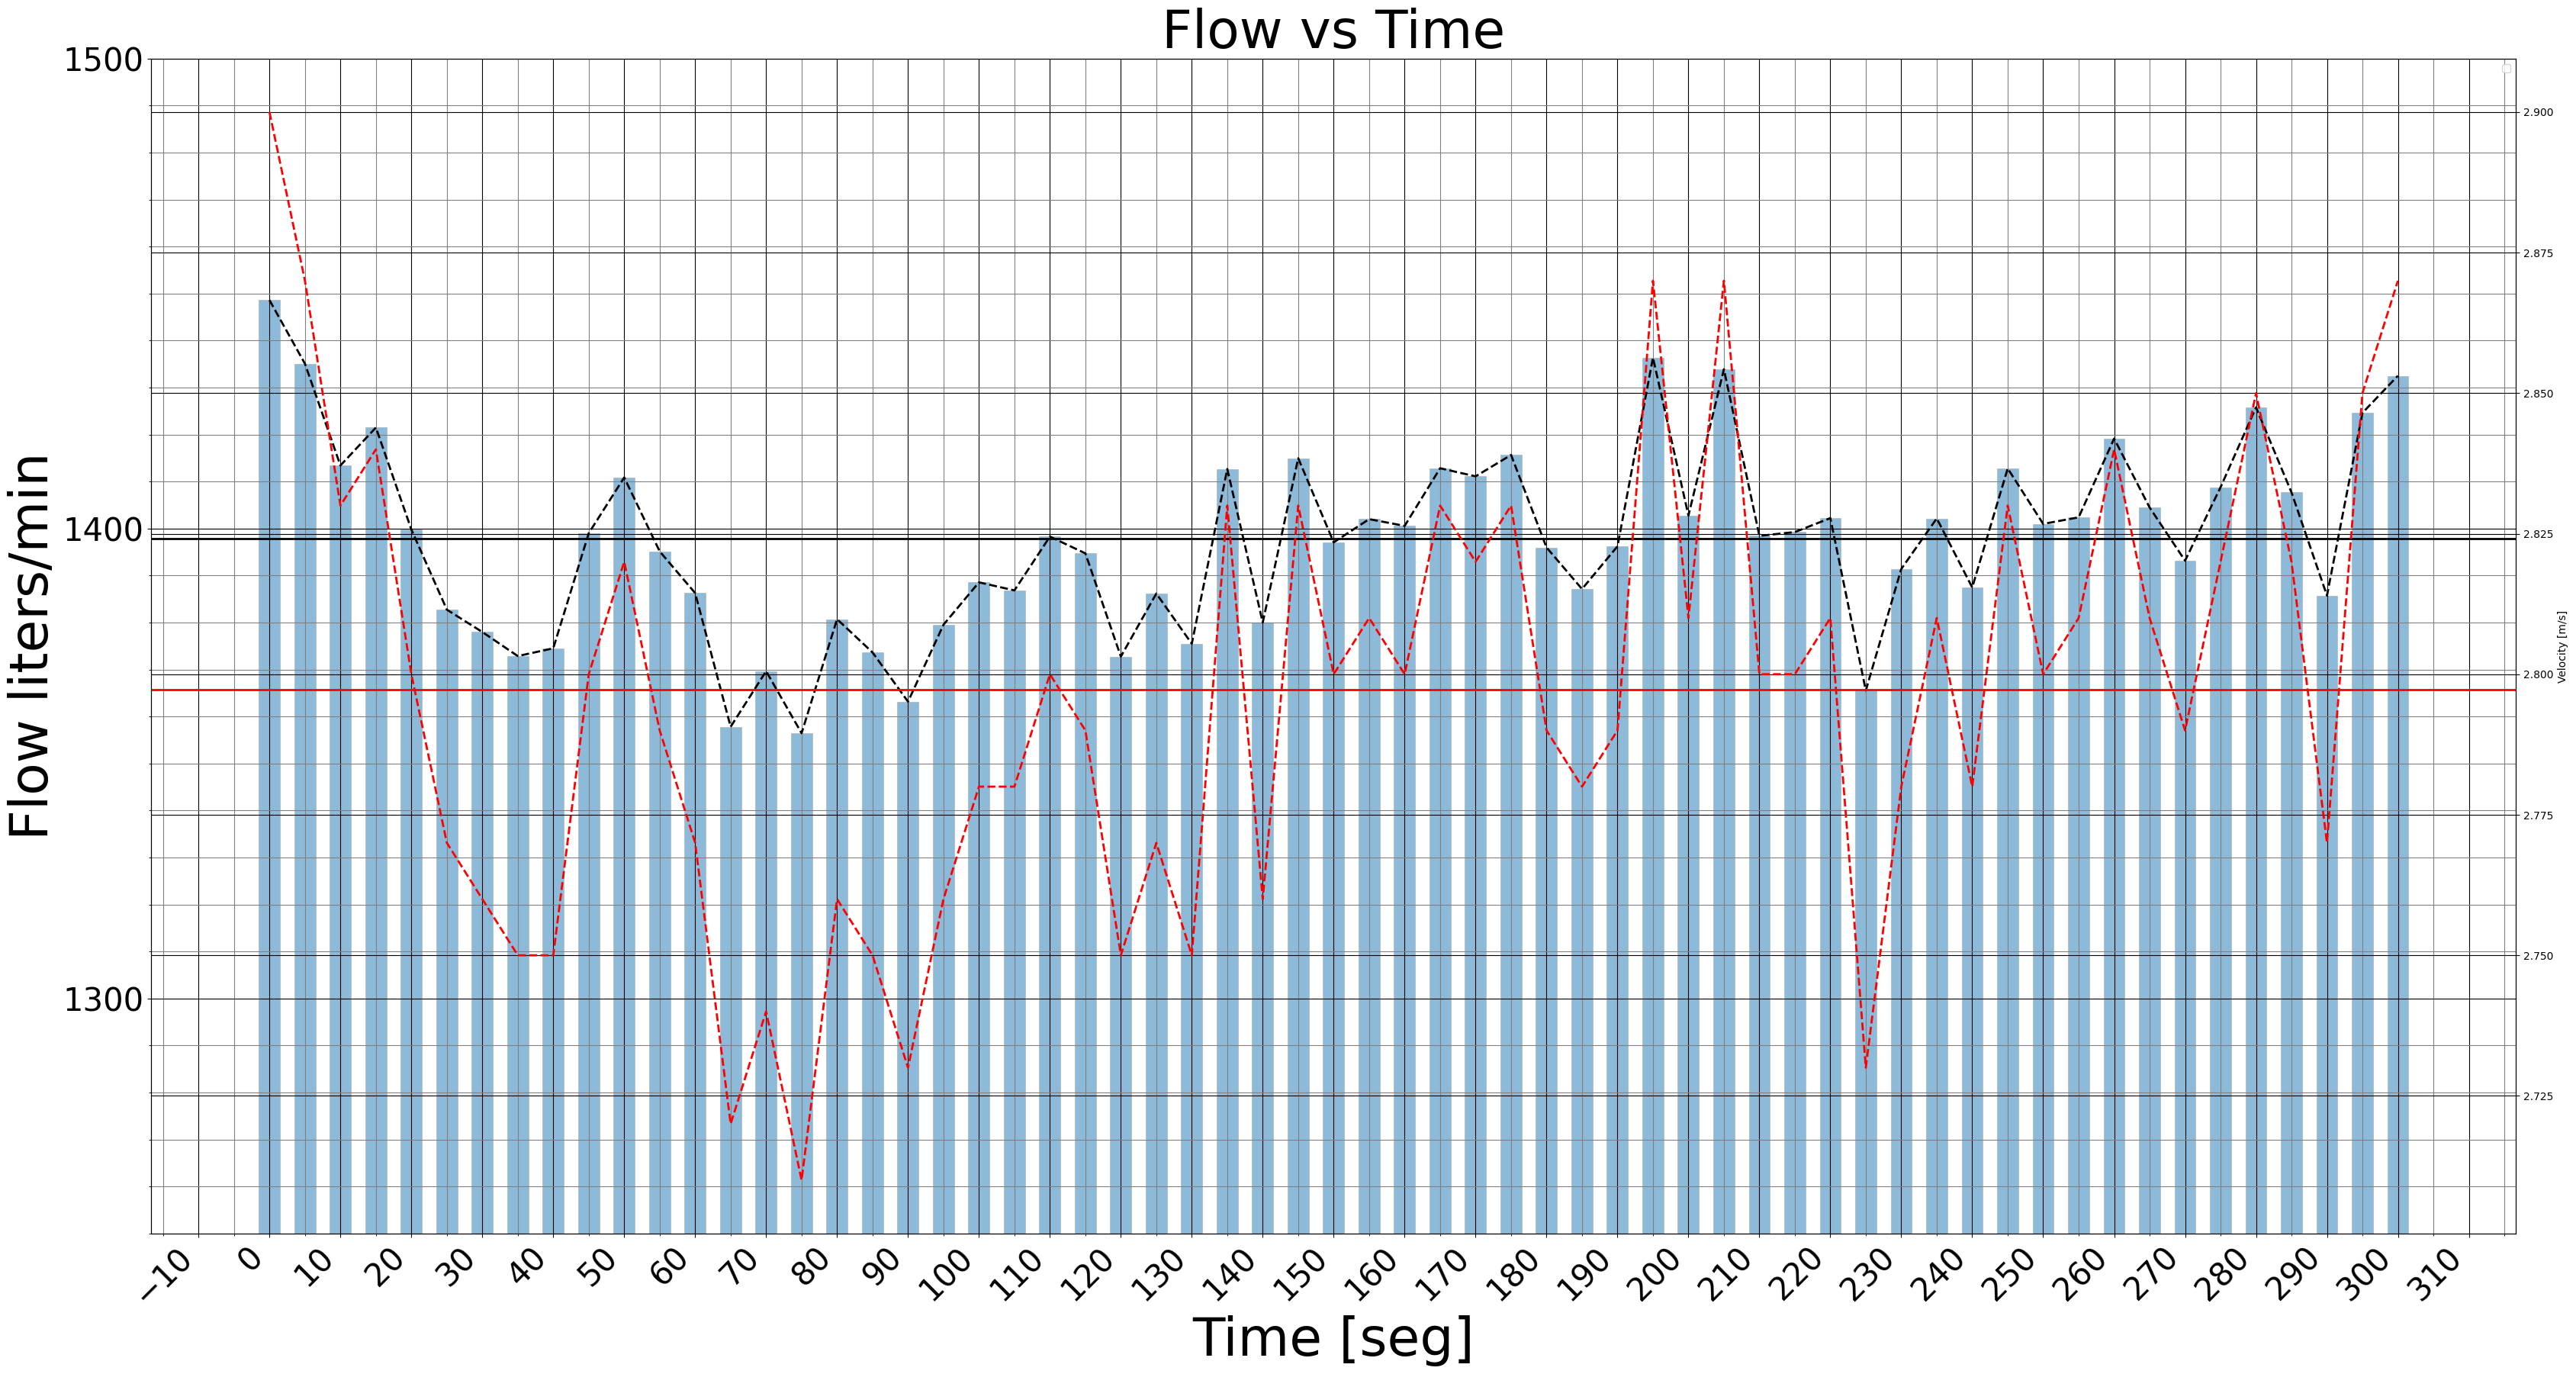

In [75]:
#@title Flow vs Time.
fig, (ax)= plt.subplots(1,1, figsize=(40,20))

ax.bar(dfx['Time'], (dfx['Flow_liters']), width=3,alpha=0.5, edgecolor="grey", linewidth=0.4)
ax.set(ylim=(1250, 1500))
ax.plot(dfx['Time'],dfx['Flow_liters'],linewidth=2,color='black',linestyle='--')

twin_axes = ax.twinx()
twin_axes.plot(dfx['Time'], dfx['Velocity'], 'r',linewidth=2,linestyle='--')
twin_axes.set_ylabel('Velocity [m/s]', color='black')
twin_axes.axhline(y=np.mean(dfx['Velocity']),linewidth=2,color='r')

twin_axes.grid(True, which='minor',color='grey',axis='both')
twin_axes.grid(True, which='major',color='black',axis='both')

text='Time [seg]'
text1='Flow liters/min'
ax.yaxis.set_major_locator(MultipleLocator(100),)
ax.yaxis.set_minor_locator(MultipleLocator(10),)

ax.xaxis.set_major_locator(MultipleLocator(10),)
ax.xaxis.set_minor_locator(MultipleLocator(5),)

ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')

ax.axhline(y=np.mean(dfx['Flow_liters']),linewidth=2,color='black')

labels2 = ax.get_xticklabels()
labels1= ax.get_yticklabels(which='both')
plt.setp(labels1,fontsize=30, horizontalalignment='right')
plt.setp(labels2, rotation=45,fontsize=30, horizontalalignment='right')

ax.set_title('Flow vs Time',fontsize=50)
ax.set_xlabel(text,fontsize=50)
ax.set_ylabel(text1,fontsize=50)
ax.legend()
ax.autoscale_view()

fig.show()